<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Training_Deep_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import matplotlib.pyplot as plt

In [119]:
import os

In [120]:
import re

In [121]:
import shutil

In [122]:
import string

In [123]:
import tensorflow as tf


In [124]:
from tensorflow.keras import layers

In [125]:
from tensorflow.keras import losses

In [126]:
print("Version", tf.__version__)

Version 2.8.0


In [127]:
fashionmnist = tf.keras.datasets.fashion_mnist

In [128]:
(train_images, train_labels),(test_images, test_labels) = fashionmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [129]:
tf.keras.layers.Dense(10 , activation="relu", kernel_initializer="he_normal")

In [130]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2.,mode="fan_avg",distribution="uniform")
tf.keras.layers.Dense(10, activation="sigmoid",kernel_initializer= he_avg_init)

In [131]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
tf.keras.layers.Dense(10, activation=leaky_relu, kernel_initializer="he_normal")

In [132]:
#To use the PRelu  parametric leaky relu 
plrelu = tf.keras.layers.PReLU()

In [133]:
#To use the self normalizing linear unit 
tf.keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [134]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=[28,28]),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax")
])

In [135]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_37 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_38 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_39 (Bat  (None, 100)            

In [136]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization_37/gamma:0', True),
 ('batch_normalization_37/beta:0', True),
 ('batch_normalization_37/moving_mean:0', False),
 ('batch_normalization_37/moving_variance:0', False)]

In [137]:
model.layers[1].updates

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  """Entry point for launching an IPython kernel.


[]

In [ ]:
model2 = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.BatchNormalization(),#Batch normalization is used to prevent vanishing and exploding gradients
tf.keras.layers.Dense(300, kernel_initializer="he_normal"), #Weight initialization techniques are also used to prevent vanishing and exploding gradients
tf.keras.layers.BatchNormalization(), 
tf.keras.layers.Activation("elu"), #Different variants of activation functions are also used to prevent vanishing and exploding gradients
tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#Saving the model 

#Imports
!pip install pyyaml h5py
import os
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Load the model and split
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

In [ ]:
train_images = train_images[:1000].reshape(-1, 28,28) #We take 1000 images from the training set and put them int a vector of 28 * 28 rows one colum
train_images = train_images/255.0 #We turn our input features into floating points between 0 and 1 this is called normalization

In [ ]:
test_images = test_images[:1000].reshape(-1,28,28) /255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.BatchNormalization(), #Included batch norm before and after every hidden layer to prevent vanishing and exploding gradients 
  #Batch norm invloves zero centering and normalizing the inputs
  tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100, activation="elu",kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="softmax")
  ])

In [ ]:
model.summary()

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

In [ ]:
#Using batch normalization just after the hidden layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation("elu"),
  tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
  tf.keras.layers.Activation("elu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10,activation="softmax")
  ]) #This is how we use batch normalization after every hidden layer in our neural network

In [ ]:
#Implementing gradient clipping in tensorflow
tf.keras.optimizers.SGD(clipvalue=1.0)#This will clip the value to be in between -1 and 1

In [ ]:
model.save("myModel.h5")

In [ ]:
#Transfer learning with keras.
#We load the model 
model_A = tf.keras.models.load_model("myModel.h5")
model_B_on_A = tf.keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation="sigmoid"))
#These two models share the same layers and parameters so when you train the new model, the original model will be affected

In [ ]:
#We clone the model and copy its parameters
model_A_clone = tf.keras.models.clone_model(model_A) #We clone the layers of the original model
model_A_clone = model_A_clone.set_weights(model_A.get_weights()) #We copy the parameters of the first model and apply them to the clone of the  original model
#By doing so the parameter of the original model won't be affected by gradient descent.

In [ ]:
#We have to freeze the cloned model's higher level layers to prevent the model from making huge errors 
#We freeze the layers by setting the trainable parameters to false of a specific layer

for layer in model_A.layers[:-1]:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("elu"),
tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model = model.save("MyModel.H5")

In [ ]:
#Load the model 
model_A = tf.keras.models.load_model("MyModel.H5")

In [ ]:
model_A_on_B = tf.keras.models.Sequential(model_A.layers[:-1]) #We remove the output layer and add our own 

In [ ]:
#Transfer learning with keras

#Lets create a sequential model
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
#Lets save the model 
model = model.save("MyModel.H5")

In [ ]:
#Lets load the model
model_A = tf.keras.models.load_model("MyModel.H5")

In [ ]:
model_A_on_B = tf.keras.models.Sequential(model_A.layers[:-1]) #We remove the last layer of our model to suit the task  

In [ ]:
#We add another layers based on the task we are trying to solve 
model_A_on_B.add(tf.keras.layers.Dense(1, activation="sigmoid")) #We add a dense layer of 1 neuron and a sigmoid activation function to better suit our task 


In [ ]:
#When we train the new model backpropagation will affect model_A  to avoid this we should clone the model 
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
for layer in model_A_clone.layers[:-1]: #We freeze the layers of our model 
  layer.trainable = False

In [ ]:
#We compile the model after we freeze and unfreeze the layers
model_A_clone.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [ ]:
#We load the saved model 
model_A = tf.keras.models.load_model("MyModel.H5")

In [ ]:
#We remove the last layer(Output layer) of our model since we have a different task 
model_A_on_B = tf.keras.models.Sequential(model_A.layers[:-1])

In [ ]:
#We add our own output layer
model_A_on_B.add(tf.keras.layers.Dense(1,activation="softmax"))

In [ ]:
#Cloning the model
model_A_clone = tf.keras.models.clone_model(model_A)
#We set the weights 
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
#We can also freeze layers in our model
for layer in model_A_clone.layers[:-1]:
  layer.trainable =False

In [ ]:
#After we freeze we compile our model 
model_A_clone.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["Accuracy"])

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
fashionmnist = tf.keras.datasets.fashion_mnist

In [ ]:
mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
x_train, x_test = x_train/255.0,x_test/255.0

In [ ]:
x_train[0].shape

In [ ]:
y_train[0].shape

In [ ]:
x_train.shape

In [ ]:
#Fashion Mnist
(train_images_full, train_labels) ,(test_images_full, test_labels) = fashionmnist.load_data()


In [ ]:

train_images = train_images/255.0 
test_images = test_images /255.0

In [ ]:
cb =tf.keras.callbacks.EarlyStopping( patience=10, restore_best_weights=True)

In [ ]:
model_A_clone.fit(x_train, y_train, epochs=4)
#Fix error

In transfer learning if the input features of your task don't have the same size like the one of the original model then you have to add a preprocessing step to resize the size of your images to be closer to the one of the original task. The output layer of the original model should always be replaced since they might not have the intented number of output as the original task. The upper hidden layers are less likely to be useful as the lower hidden layers since the task might differ significantly from the ones that were most useful.

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=[28,28]),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
tf.keras.layers.Activation("elu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(1,activation="softmax")
])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train, epochs=20)

In [ ]:
#cb = tf.keras.callbacks.ModelCheckpoint(save) DO SAVING THE MODEL ONCE AGAIN 

In [ ]:
model.save("MyModel.H5")

In [ ]:
#We load the model 
model_A = tf.keras.models.load_model("MyModel.H5")

In [ ]:
#We create a new model based on the layers of the loaded model 
model_A_reloaded = tf.keras.models.Sequential(model_A.layers[:-1]) #We also remove the last layer of this model since the  task is different from the original one which means the output layer should have different number of neurons
 

In [ ]:
#We add our own output layer
model_A_reloaded.add(tf.keras.layers.Dense(1, activation="softmax"))

In [ ]:
#Cloning the model 
model_A_clone = tf.keras.models.clone_model(model_A)
#This clone comes without parameters so we set them 
model_A_clone.set_weights(model_A.get_weights())

In [ ]:
#We freeze the layers 
for layer in model_A_clone.layers[:-1]: #To freeze the layers we set every layers trainable attributes to false
  layer.trainable = False 

In [ ]:
model_A_clone.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer="sgd", metrics=["accuracy"])

In [ ]:
#We should compile the model after we freeze of unfreeze a particular layer



In [ ]:
model_A_clone.layers[:-1]


In [ ]:
model_A_clone.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model

In [ ]:
model_A_clone.layers[:-1]

In [ ]:
model_A_clone.layers[:-1]

In [ ]:
model_A_New = tf.keras.models.Sequential(model_A_clone.layers[:-1])

In [ ]:
model_A_New1 = tf.keras.models.Sequential(model_A_New.layers[:-1])

In [ ]:
model_A_New1.summary()

In [ ]:
model_A_New1.set_weights(model_A.get_weights())

In [ ]:
model_A_New1.summary()

In [ ]:
model_A_New.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])

In [ ]:
model_A_New.fit(x_train,y_train,epochs=10)

In [ ]:
model_A_clone.fit(x_train, y_train, epochs=20)

In [ ]:
mnistOne= tf.keras.datasets.mnist.load_data()

In [ ]:
(x_train_full,x_test),(y_train_full, y_test) = mnistOne

In [ ]:
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split

In [ ]:
mnistOne = tf.keras.datasets.mnist.load_data()

In [ ]:
(x_train_full, x_test),(y_train_full, y_test) = mnistOne

In [ ]:
x_train_full.shape

In [ ]:
y_train_full.shape

In [ ]:
x_train,x_valid = x_train_full[:5000], x_train_full[:5000]
y_train,y_valid = y_train_full[:5000], y_train_full[:5000]

In [ ]:
x_train.shape, y_train.shape

In [ ]:
model_A_clone.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [ ]:
model_A_clone.fit(x_train,y_train,epochs=5, validation_data=[x_valid, y_valid])

In [ ]:
model_A_clone.summary()

In [ ]:
#Freezing layers during transfer learning 
for layer in model_A_clone.layers[:-1]:
  layer.trainable = False

In [ ]:
#Unfreezing layers during transfer learning
for layer in model_A_clone.layers[:-1]:
  layer.trainable = True

In [ ]:
optimizer = tf.keras.optimizers.SGD(1e-3)

Ways of speeding up training of a deep neural network 
- Using a good weight initialization strategy.
- Using a different variants of activation functions.
- Using batch normalisation.
- Using parts of a pretrained neural network or so called transfer learning.

Another way of boosting the training of a deep neural network is using other optimizers than the regular or vanilla gradient descent algorithm.
Other optimization strategies include: 
Momentum optimization, Nesterov Accelerated gradient, RMS prop ,AdaGrad, Adam and Nadam optimization.


In [ ]:
import tensorflow as tf
optimizers = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

Another faster optimization algorithm that is almost faster than vanilla momentum optmization is Nesterov Momentum optimization.

In [ ]:
#Implementing the Nesterov Accelerated Gradient or Nesterov momentum optimization function 
optimizers = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [188]:
import os
import tensorflow as tf
from tensorflow import keras

In [189]:
print("Version: ", tf.__version__)

Version:  2.8.0


In [250]:
#We load  and split the data
(train_images,train_labels), (test_images, test_labels) =tf.keras.datasets.mnist.load_data() 

In [251]:
train_images.shape

(60000, 28, 28)

In [252]:
train_images = train_images/255.0

In [253]:
test_images = test_images/255.0

In [254]:
train_images[0].shape

(28, 28)

In [240]:
#We create the sequential model 
#model = tf.keras.models.Sequential([
#tf.keras.layers.Flatten(input_shape=(784,)),
#tf.keras.layers.BatchNormalization(),
#tf.keras.layers.Dense(300,kernel_initializer="he_normal", name="Hidden1"),
#tf.keras.layers. Activation('elu'),
#tf.keras.layers.Dense(100,kernel_initializer="he_normal", name="Hidden2"),
#tf.keras.layers.Activation('elu'),
#tf.keras.layers.BatchNormalization(),
#tf.keras.layers.Dense(10,activation="softmax", name="Output")
#])

In [255]:
model.build()

In [ ]:
model.summary()

In [257]:
#Compile the model 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="Adam",metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
model.fit(train_images,train_labels, epochs=10)

In [268]:
def createModel():
  model = tf.keras.models.Sequential([
   tf.keras.layers.Flatten(input_shape=train_images[0].shape, name="InputLayer"),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dense(300,kernel_initializer="he_normal",name="HiddenLayer1"),
   tf.keras.layers.Activation('elu'),
   tf.keras.layers.Dense(100,kernel_initializer="he_normal", name="HiddenLayer2"),
   tf.keras.layers.Activation('elu'),
   tf.keras.layers.BatchNormalization(),
   tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer")   
  ])
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="SGD", metrics=[tf.keras.metrics.Accuracy()])
  return model

In [269]:
model = createModel()

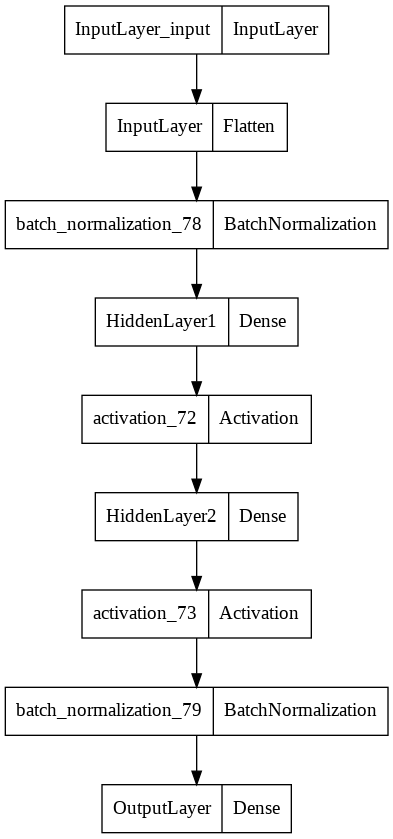

In [270]:
tf.keras.utils.plot_model(model)

In [271]:
model.build()

In [272]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization_78 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 activation_72 (Activation)  (None, 300)               0         
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 activation_73 (Activation)  (None, 100)               0         
                                                     

In [273]:
#Lets create a callback checkpoint that saves the model's weights during training
#Create the check point path
cp_path = "train_one/cp.ckpt" #Check point path
cp_dir = os.path.dirname(cp_path) #Check point directory 



In [274]:
#Lets create a callback that save the model's weights durin training
cb = tf.keras.callbacks.ModelCheckpoint(cp_path,verbose=1, save_best_only=True)

In [ ]:
#Lets train the model with the callbacks assigned 
history = model.fit(train_images, train_labels,epochs =10 , validation_data=(test_images, test_labels), callbacks=[cb])

In [292]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=train_images[0].shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(10, activation="softmax")
])

In [293]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="Adam",metrics=['accuracy'])

In [296]:
model.fit(train_images, train_labels, epochs =20,validation_data=[test_images, test_labels], callbacks=[cb])

Epoch 1/20
1873/1875 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9924
Epoch 1: val_loss improved from inf to 0.09806, saving model to train_one/cp.ckpt
INFO:tensorflow:Assets written to: train_one/cp.ckpt/assets
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0220 - accuracy: 0.9923 - val_loss: 0.0981 - val_accuracy: 0.9785
Epoch 2/20
1875/1875 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9924
Epoch 2: val_loss did not improve from 0.09806
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.1026 - val_accuracy: 0.9781
Epoch 3/20
1872/1875 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9930
Epoch 3: val_loss did not improve from 0.09806
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0203 - accuracy: 0.9930 - val_loss: 0.1119 - val_accuracy: 0.9782
Epoch 4/20
1867/1875 [============================>.] - ETA: 0s - lo

In [297]:
os.listdir(cp_dir)

['cp.ckpt']